In [138]:
#libraries installieren
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error,  median_absolute_error

In [139]:
#csv aus web Analytics einlesen
immodf=pd.read_csv("Immobilien.csv")
immodf.head()

,Unnamed: 0,ID,Ort,Umkreis,MaxOrt,Preis,Fläche,Zimmer
0,0,28zn659,berlin,50,max. 15 km,7.790.000 €,['780 m²'],['30 Zi.']
1,1,274he5l,berlin,50,max. 10 km,690.000 €,['323 m²'],['8 Zi.']
2,2,277z85u,berlin,50,max. 10 km,1.950.000 €,['212.58 m²'],['7 Zi.']
3,3,26ekx52,berlin,50,max. 10 km,698.000 €,['180 m²'],['4 Zi.']
4,4,26zkl56,berlin,50,max. 10 km,429.000 €,['97 m²'],['4 Zi.']


In [140]:
immodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   ID          200 non-null    object
 2   Ort         200 non-null    object
 3   Umkreis     200 non-null    int64 
 4   MaxOrt      200 non-null    object
 5   Preis       200 non-null    object
 6   Fläche      200 non-null    object
 7   Zimmer      200 non-null    object
dtypes: int64(2), object(6)
memory usage: 12.6+ KB


<AxesSubplot:>

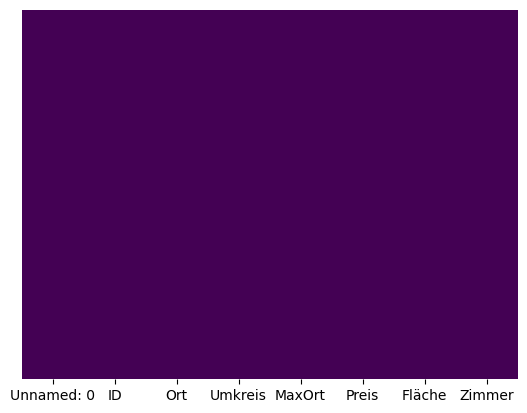

In [141]:
#Nullwerte vorhanden?
sns.heatmap(immodf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [142]:
#Nullwerte ggf. entfernen
immodf = immodf.dropna()

In [143]:
#data preparation
immodf['Raeume'] = immodf['Zimmer'].apply(lambda x: x[1:-1])
immodf['Raeume'] = immodf['Raeume'].str.replace(" Zi","")
immodf['Raeume'] = immodf['Raeume'].str.replace(".","")
immodf['Raeume'] = immodf['Raeume'].str.replace("'","")
immodf.loc[:,"Raeume"]=pd.to_numeric(immodf["Raeume"])
immodf = immodf.drop('Zimmer', axis=1)

immodf['Flaeche'] = immodf['Fläche'].apply(lambda x: x[1:-1])
immodf['Flaeche'] = immodf['Flaeche'].str.replace(" m²","")
immodf['Flaeche'] = immodf['Flaeche'].str.replace(".","")
immodf['Flaeche'] = immodf['Flaeche'].str.replace("'","")
immodf.loc[:,"Flaeche"]=pd.to_numeric(immodf["Flaeche"])
immodf = immodf.drop('Fläche', axis=1)

immodf["MaxOrt"]=immodf["MaxOrt"].str.replace("max. ","") 
immodf["MaxOrt"]=immodf["MaxOrt"].str.replace(" km","") 
immodf.loc[:,"MaxOrt"]=pd.to_numeric(immodf["MaxOrt"])

immodf["Preis"]=immodf["Preis"].str.replace(".","")
immodf["Preis"]=immodf["Preis"].str.replace(" €","")
immodf["Preis"]=immodf["Preis"].str.replace("auf Anfrage","0") 
immodf.loc[:,"Preis"]=pd.to_numeric(immodf["Preis"])

/var/folders/1c/xbr5tqd11kj2_4xtc05ft2dc0000gp/T/ipykernel_19536/2001643243.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  immodf['Raeume'] = immodf['Raeume'].str.replace(".","")
/var/folders/1c/xbr5tqd11kj2_4xtc05ft2dc0000gp/T/ipykernel_19536/2001643243.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  immodf['Flaeche'] = immodf['Flaeche'].str.replace(".","")
/var/folders/1c/xbr5tqd11kj2_4xtc05ft2dc0000gp/T/ipykernel_19536/2001643243.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  immodf["MaxOrt"]=immodf["MaxOrt"].str.replace("max. ","")
/var/folders/1c/xbr5tqd11kj2_4xtc05ft2dc0000gp/T/ipykernel_19536/2001643243.

In [146]:
immodf.head()

,Unnamed: 0,ID,Ort,Umkreis,MaxOrt,Preis,Raeume,Flaeche
0,0,28zn659,berlin,50,15,7790000,30.0,780
1,1,274he5l,berlin,50,10,690000,8.0,323
2,2,277z85u,berlin,50,10,1950000,7.0,21258
3,3,26ekx52,berlin,50,10,698000,4.0,180
4,4,26zkl56,berlin,50,10,429000,4.0,97


In [147]:
immodf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   ID          200 non-null    object 
 2   Ort         200 non-null    object 
 3   Umkreis     200 non-null    int64  
 4   MaxOrt      200 non-null    int64  
 5   Preis       200 non-null    int64  
 6   Raeume      195 non-null    float64
 7   Flaeche     200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [149]:
#Duplikate entfernen
immodf = immodf.drop_duplicates(subset=["Ort", "Flaeche", "Raeume", "Preis"], keep='first')
immodf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  197 non-null    int64  
 1   ID          197 non-null    object 
 2   Ort         197 non-null    object 
 3   Umkreis     197 non-null    int64  
 4   MaxOrt      197 non-null    int64  
 5   Preis       197 non-null    int64  
 6   Raeume      192 non-null    float64
 7   Flaeche     197 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 13.9+ KB


In [ ]:
#Einzigartige Werte je Feature
for col in immodf.columns:
    values = immodf[col].unique()
    print(col, "has", len(immodf[col].unique()), "unique values")

Unnamed: 0 has 197 unique values
ID has 197 unique values
Ort has 5 unique values
Umkreis has 1 unique values
MaxOrt has 8 unique values
Preis has 147 unique values
Fläche has 158 unique values
Zimmer has 29 unique values


In [ ]:
#Wie viele Häuser werden je Stadt betrachtet?
immodf["Ort"].value_counts()

hamburg      40
muenchen     40
berlin       39
koeln        39
stuttgart    39
Name: Ort, dtype: int64

In [ ]:
#Welche numerischen Features gibt es im dataframe?
numeric_features=immodf.select_dtypes(include=np.number).columns.to_list()
numeric_features

['Unnamed: 0', 'Umkreis']

In [ ]:
#numerische Features analysieren
immodf.describe()

,Unnamed: 0,Umkreis
count,197.000000,197.0
mean,99.401015,50.0
std,57.922948,0.0
min,0.000000,50.0
25%,50.000000,50.0
50%,99.000000,50.0
75%,149.000000,50.0
max,199.000000,50.0


In [ ]:
#Boxplots und Histogramme

In [ ]:
#Korrelationsmatrix

In [ ]:
#Scattermatrix

In [ ]:
#Spannende Zusammenhänge genauer betrachten (z.B. mit 3D Scatter)

In [ ]:
#Welche kategorialen Features gibt es?
cat_features=immodf.select_dtypes(exclude=np.number).columns.to_list()
cat_features

['ID', 'Ort', 'MaxOrt', 'Preis', 'Fläche', 'Zimmer']

In [ ]:
#parallel categories

In [ ]:
#value counts

In [ ]:
#conditional probabilities

In [ ]:
#Zusammenhänge zwischen numerischen und kategorialer Features

In [ ]:
#Preprocessing
#One Hot Encoding kategorialer Features

In [ ]:
#Test Train Split
X=
y=
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

SyntaxError: invalid syntax (2370415036.py, line 2)

In [ ]:
#Regression mit Linear Regression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

In [ ]:
ypred=linreg.predict(X_test)

In [ ]:
for pred, target in zip(ypred[:10],y_test[:10]):
    print("Predicted: {0:2.2f} \t True: {1:2.2f}".format(pred,target))

In [ ]:
#Evaluation der Regression
def determineRegressionMetrics(y_test,y_pred,title=""):
    mse = mean_squared_error(y_test, y_pred)
    mad = mean_absolute_error(y_test, y_pred)
    rmsle=np.sqrt(mean_squared_error(np.log(y_test+1),np.log(y_pred+1)))# +1 for avoiding log(0) 
    r2=r2_score(y_test, y_pred)
    med=median_absolute_error(y_test, y_pred)
    print(title)
    print("Mean absolute error =", round(mad, 2))
    print("Mean squared error =", round(mse, 2))
    print("Median absolute error =", round(med, 2))
    print("R2 score =", round(r2, 2))
    print("Root Mean Squared Logarithmic Error =",rmsle)

In [ ]:
determineRegressionMetrics(y_test,ypred)

In [ ]:
#Visualisierung der Evaluation
fig=px.scatter(x=ypred,y=y_test,opacity=0.5,
               labels={"x":"predicted charges","y":"true charges"},title="True vs. Estimated Charges")
fig.add_trace(go.Line(x=[np.min(y_test),np.max(y_test)],y=[np.min(y_test),np.max(y_test)]))
fig.update_traces(marker=dict(size=12))
fig.show("notebook")

In [ ]:
#Feature importance
importance = linreg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
#cross validation
linreg_scores = linreg_score(linreg, X_train, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(linreg_scores)))

In [ ]:
#Regression mit Decision Tree
#hier selbe Schritte wie zuvor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

In [ ]:
#Regression mit Gradient Boosting Tree
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr_scores = cross_val_score(gbr, X_train, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(gbr_scores)))

In [ ]:
#Pipeline möglich statt alle einzeln?